In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

%matplotlib inline

In [23]:
df_all = pd.read_csv('household_power_consumption.txt', sep=';') #parse_dates=['Date']
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


/home/cocoza4/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [24]:
df_all.shape

(2075259, 9)

In [25]:
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [26]:
df_all['date'] = lookup(df_all['Date'])
df_all.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16


In [69]:
df_all['date'].min(), df_all['date'].max()

(Timestamp('2006-12-16 00:00:00'), Timestamp('2010-12-11 00:00:00'))

In [27]:
df = df_all[['date', 'Time', 'Global_active_power']]
df.head()

,date,Time,Global_active_power
0,2006-12-16,17:24:00,4.216
1,2006-12-16,17:25:00,5.360
2,2006-12-16,17:26:00,5.374
3,2006-12-16,17:27:00,5.388
4,2006-12-16,17:28:00,3.666


In [28]:
msk = (df['Time'] == '?') | (df['Global_active_power'] == '?')
print(df[msk].shape)
df[msk].head()

(25979, 3)


,date,Time,Global_active_power
6839,2006-12-21,11:23:00,?
6840,2006-12-21,11:24:00,?
19724,2006-12-30,10:08:00,?
19725,2006-12-30,10:09:00,?
41832,2007-01-14,18:36:00,?


In [29]:
df.replace('?', np.nan, inplace=True)

/home/cocoza4/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df.head()

,date,Time,Global_active_power
0,2006-12-16,17:24:00,4.216
1,2006-12-16,17:25:00,5.360
2,2006-12-16,17:26:00,5.374
3,2006-12-16,17:27:00,5.388
4,2006-12-16,17:28:00,3.666


In [31]:
df[msk].head()

,date,Time,Global_active_power
6839,2006-12-21,11:23:00,NaN
6840,2006-12-21,11:24:00,NaN
19724,2006-12-30,10:08:00,NaN
19725,2006-12-30,10:09:00,NaN
41832,2007-01-14,18:36:00,NaN


In [32]:
df.fillna(method='ffill', inplace=True)
print(df.shape)
df.head()

(2075259, 3)


/home/cocoza4/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,date,Time,Global_active_power
0,2006-12-16,17:24:00,4.216
1,2006-12-16,17:25:00,5.360
2,2006-12-16,17:26:00,5.374
3,2006-12-16,17:27:00,5.388
4,2006-12-16,17:28:00,3.666


In [33]:
df[pd.isnull(df).any(axis=1)]

,date,Time,Global_active_power


In [34]:
df[msk].head()

,date,Time,Global_active_power
6839,2006-12-21,11:23:00,0.244
6840,2006-12-21,11:24:00,0.244
19724,2006-12-30,10:08:00,6.218
19725,2006-12-30,10:09:00,6.218
41832,2007-01-14,18:36:00,3.222


In [35]:
df['global_active_power'] = df['Global_active_power'].astype(np.float)

/home/cocoza4/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df[df['date'] == '16/12/2006']

,date,Time,Global_active_power,global_active_power
0,2006-12-16,17:24:00,4.216,4.216
1,2006-12-16,17:25:00,5.360,5.360
2,2006-12-16,17:26:00,5.374,5.374
3,2006-12-16,17:27:00,5.388,5.388
4,2006-12-16,17:28:00,3.666,3.666
5,2006-12-16,17:29:00,3.520,3.520
6,2006-12-16,17:30:00,3.702,3.702
7,2006-12-16,17:31:00,3.700,3.700
8,2006-12-16,17:32:00,3.668,3.668
9,2006-12-16,17:33:00,3.662,3.662


In [40]:
df_agg_day = df[['date', 'global_active_power']].set_index('date').groupby(pd.TimeGrouper('D')).sum()
print(df_agg_day.shape)
df_agg_day.head()

(1457, 1)


,global_active_power
date,
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


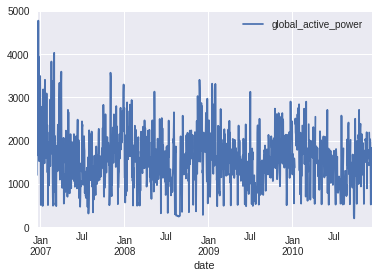

In [67]:
df_agg_day.plot()

In [76]:
df_agg_weekly = df[['date', 'global_active_power']].set_index('date').groupby(pd.TimeGrouper('W')).sum()
print(df_agg_weekly.shape)
df_agg_weekly.head()

(209, 1)


,global_active_power
date,
2006-12-17,4599.636
2006-12-24,17477.616
2006-12-31,19748.954
2007-01-07,11613.176
2007-01-14,14315.914


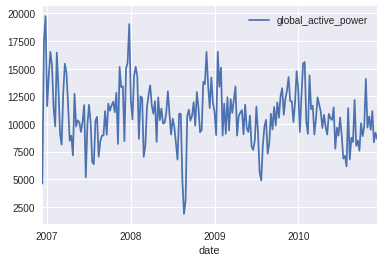

In [77]:
df_agg_weekly.plot()

In [59]:
df_agg_month = df[['date', 'global_active_power']].set_index('date').groupby(pd.TimeGrouper('M')).sum()
print(df_agg_month.shape)
df_agg_month.head()

(49, 1)


,global_active_power
date,
2006-12-31,41826.206
2007-01-31,63805.696
2007-02-28,46569.120
2007-03-31,55277.946
2007-04-30,40473.124


In [60]:
df_agg_month.head()

,global_active_power
date,
2006-12-31,41826.206
2007-01-31,63805.696
2007-02-28,46569.120
2007-03-31,55277.946
2007-04-30,40473.124


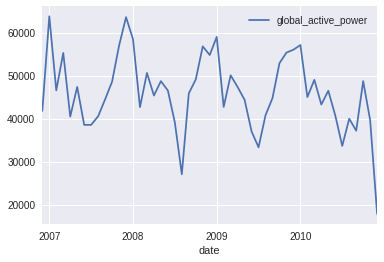

In [66]:
df_agg_month.plot()

In [78]:
df_agg_quarterly = df[['date', 'global_active_power']].set_index('date').groupby(pd.TimeGrouper('Q')).sum()
print(df_agg_quarterly.shape)
df_agg_quarterly.head()

(17, 1)


,global_active_power
date,
2006-12-31,41826.206
2007-03-31,165652.762
2007-06-30,126399.404
2007-09-30,123556.234
2007-12-31,169124.092


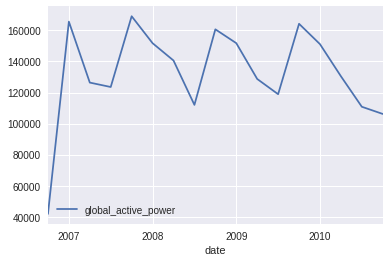

In [79]:
df_agg_quarterly.plot()

In [74]:
df_agg_year = df[['date', 'global_active_power']].set_index('date').groupby(pd.TimeGrouper('A')).sum()
print(df_agg_year.shape)
df_agg_year.head()

(5, 1)


,global_active_power
date,
2006-12-31,41826.206
2007-12-31,584732.492
2008-12-31,565137.206
2009-12-31,563708.226
2010-12-31,498676.518


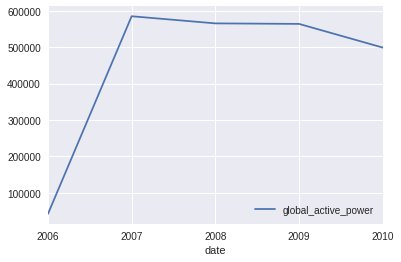

In [75]:
df_agg_year.plot()

In [82]:
df_agg_weekly.reset_index().head()

,date,global_active_power
0,2006-12-17,4599.636
1,2006-12-24,17477.616
2,2006-12-31,19748.954
3,2007-01-07,11613.176
4,2007-01-14,14315.914


In [84]:
df_weekly_ = df_agg_weekly.reset_index()
df_weekly_train = df_weekly_[df_weekly_['date'] <= '2009-12-31']
df_weekly_train.shape

(159, 2)

In [85]:
df_weekly_test = df_weekly_[df_weekly_['date'] > '2009-12-31']
df_weekly_test.shape

(50, 2)

# Models

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
# model.fit(df_weekly_train['date'], df_weekly_train['global_active_power'])